# Problem 1


### A few weeks ago, you worked on finding periodic planet signals in the light curve of Kepler-90, a star that is photometrically stable. The periodogram worked nicely because 

### a) we cleaned the light curve to squelch red noise
### b) the signals really were periodic and we could implictly make a strong assumption about the covariance between points.

### Life gets harder when the star itself has quasi-periodic variations because it has a magnetic field and is rotating (ruh oh...) 

In [1]:
%matplotlib inline

from astropy.table import Table
tab = Table.read('KIC2157356.txt',format='ascii')
tab['quarter'] = tab['quarter'].astype('int')
tab

<Table length=14588>
       time             flux             error        quarter
     float64          float64           float64        int64 
----------------- ---------------- ------------------ -------
539.4710179205795 5221.16455078125  4.891251087188721       6
539.4914521464307 5216.07958984375  4.892819404602051       6
539.5118864718097    5225.43359375  4.891888618469238       6
539.5323205971945   5233.111328125  4.892074108123779       6
539.5527548221144 5221.17333984375  4.891964435577393       6
 539.573189147035 5220.09521484375  4.891523361206055       6
539.5936232714812 5222.14208984375  4.893854141235352       6
539.6140574957026 5224.57958984375  4.893648147583008       6
539.6344918194518 5223.78564453125  4.894421100616455       6
539.6549259432068 5231.61669921875  4.894259929656982       6
              ...              ...                ...     ...
905.7431114583233 5863.63427734375  4.119894027709961       9
905.7635458554214  5867.2041015625 4.1199517250061035       9
905.7839800525107   5867.841796875  4.119955539703369       9
905.8044143491425 5862.43798828125  4.119598388671875       9
 905.824848745775 5863.95458984375  4.118742942810059       9
 905.845282941933   5870.349609375  4.119640827178955       9
 905.865717337867 5867.27099609375  4.119102478027344       9
905.8861516335674 5868.67822265625  4.119019031524658       9
905.9065858290269   5864.173828125  4.119871616363525       9
905.9270202242624 5861.61572265625  4.119407653808594       9

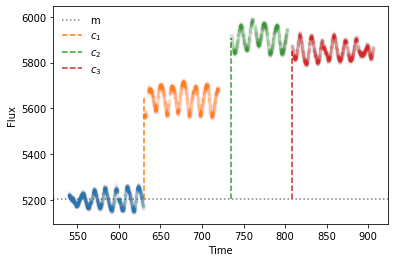

In [2]:
qs = sorted(np.unique(tab['quarter']))
means = []
cycle_map = {}
for i, q in enumerate(qs):
    ind = tab['quarter']==q
    t = tab[ind]
    plt.errorbar(t['time'],t['flux'], yerr=t['error'], marker='.', linestyle='None', alpha=0.01)
    meanflux = np.mean(t['flux'])
    cycle_map[q] = ind
    means.append(meanflux)
    if i == 0:
        plt.axhline(meanflux, label='m', color='grey', ls=":")
    else:

        vmin = means[0]
        vmax = meanflux

        plt.plot((t['time'][0], t['time'][0]), (vmin, vmax), label=rf'$c_{i}$', color=f'C{i}', ls='--') 
    
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend(frameon=False)


### As you can see there is some kind of periodic singal, but it's not perfectly regular. There is also the usual offsets between Kepler photometry in different cycles.

### You'll need four parameters to describe constants ($m, c_1, c_2, c_3$) to renormalize the flux to the first cycle, illustrated in the figure above. 
### $m$ specifies the mean of the Gaussian process, while $c_1, c_2, c_3$ are nuisance parameters. 

### You know how to implement a model with one common zeropoint and multiple offsets - this was what you did on your midterm.


### You'll also need some model to describe the quasi-periodic oscillations. There's no good way to write down a model in real for these in real space because stellar magnetic fields are incredibly complicated. 

### Instead we'll write down a model for the covariance between the observations and use a Gaussian process to model the star. You can model quasi-periodic correlation structure as something periodic + something that varies the periodicity smoothly:

## $$k(t_i, t_j) = A\cdot \exp\left(-\Gamma_1\cdot \sin^2\left(\frac{\pi}{P}|t_i - t_j|\right) -  \frac{|t_i-t_j|^2}{\lambda}) \right) $$

### This is another 4 parameters, ($A, \Gamma_1, P, \lambda$) parameters for a total of 8: ($m, c_1, c_2, c_3, A, \Gamma_1, P, \lambda$)


<hr>

### Q1: To implement the GP correlations, use the `george` package to construct this quasi-periodic kernel
https://george.readthedocs.io/en/latest/user/kernels/


### In particular, you should be able to combine `ExpSine2Kernel` and `ExpSquaredKernel` to get a model for the quasi-periodic oscillations.

### Q2: To implement the full model, read how to use `george`'s modeling protocol:
https://george.readthedocs.io/en/latest/tutorials/model/

### Q3: With your model and likelihood constructured, write down priors on the parameters (you should be able to estimate from the plots)

### Q4: Use `emcee` to optimize the model parameters and hyper-parameters, **using only every 10th sample in time**
### (Don't go overboard with the number of walkers or steps)
https://george.readthedocs.io/en/latest/tutorials/hyper/ may help

### Q5: Plot your posterior model over the data after correcting for the offsets, showing the points you used to condition the GP in red, and the remaining data in black. 

# Extra Credit (but required!)
## Please fill out the project survey form: https://forms.gle/93VbyWHQE9VcRw8RA
### and let us know below!